In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import datetime
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [2]:
# test= pd.read_csv('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')
test=pd.read_csv('E:/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

In [3]:
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

C:\Users\atif\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [4]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [5]:
test_new.shape #ROWS, COLUMNS

(25000, 4223)

In [10]:
test_new = test_new.set_index('dateTime') # make dataTime column as index of the dataframe test_new

In [11]:
multivariate_column_label=['DEWIHOBT9_I0','AEDATZ_HO_V0','RWWIHOB_HWT0','RWWIHOB_MWT0',
                        'AEWIHO_T9AV2','AEDAHO_T9_V2'] # choose column with which the following work will be conducted

size_column = len(multivariate_column_label)
print(size_column)

6


In [12]:
multivariate_data=test_new.iloc[500:18000][multivariate_column_label]
multivariate_data=multivariate_data.loc[::-1]
print(multivariate_data.head())

                     DEWIHOBT9_I0  AEDATZ_HO_V0  RWWIHOB_HWT0  RWWIHOB_MWT0  \
dateTime                                                                      
2019-03-21 23:21:00         100.0     41.361023     97.068136     97.762204   
2019-03-21 23:22:00         100.0     41.029029     97.044139     97.784631   
2019-03-21 23:23:00         100.0     40.848848     97.052145     97.734956   
2019-03-21 23:24:00         100.0     40.879590     96.932183     97.711727   
2019-03-21 23:25:00         100.0     40.980816     96.955369     97.722945   

                     AEWIHO_T9AV2  AEDAHO_T9_V2  
dateTime                                         
2019-03-21 23:21:00     77.228514     73.880073  
2019-03-21 23:22:00     76.970870     73.332486  
2019-03-21 23:23:00     77.603184     72.955013  
2019-03-21 23:24:00     77.513527     72.977738  
2019-03-21 23:25:00     77.091041     73.189071  


In [7]:
# # multivariate_column_label=['AEDATZ_HO_V0','AEWIHO_T9AV2','AEWIHOAVABV2','RWWIHOA_HWT0','AEWIHOAKZ_V0',
# #                            'RWWIHOA_MWT0','AEDAHO_T9_V2'] # choose column with which the following work will be conducted
# univariate_column_label=['AEDAHO_T9_V2']

# multivariate_column_label=['AEDATZ_HO_V0', 'AEWIHO_T9AV2','AEDAHO_T9_V2']
# multivariate_data=test_new.iloc[2000:8000][multivariate_column_label] #just for checking whether it is working or not

In [7]:
# multivariate_data=multivariate_data.loc[::-1]

In [8]:
# print(multivariate_data.tail())

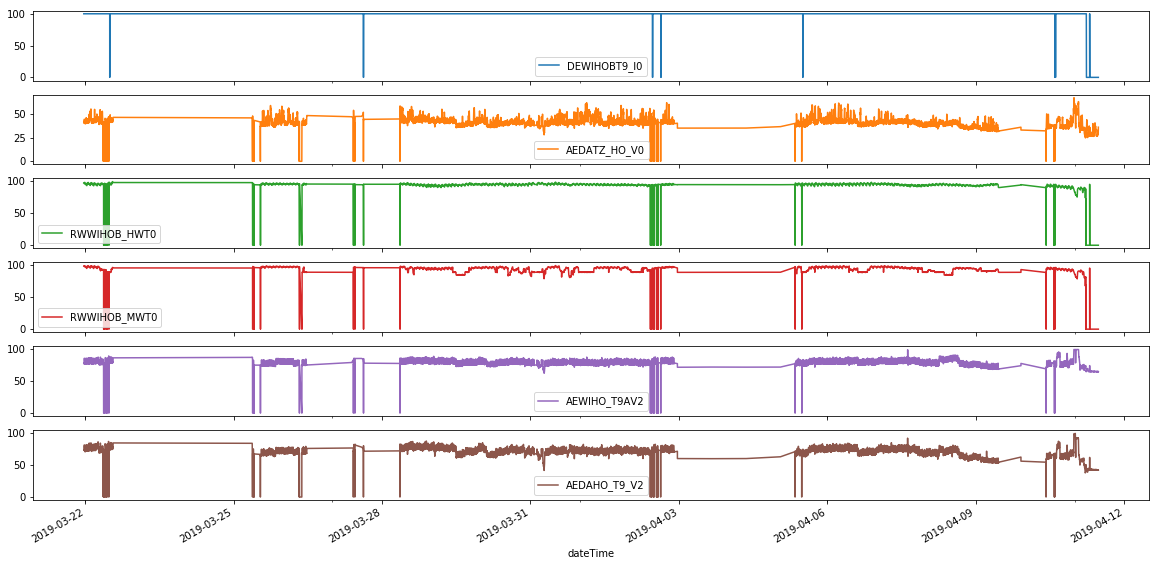

In [14]:
ax = multivariate_data.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,40)
# plt.savefig('E:/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/images_from_training/multivariate_data_regression.png')
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

# Below the row has deleted where DEWIHOBT9_I0 has 'zero' value

In [17]:
zero_index=[]
zero_index=np.array(zero_index)
for index, value in multivariate_data.iterrows():
    for i , v in enumerate(value):
        if i == 0  and v == 0.0:
#             print('index: ',index)
            zero_index=np.append(zero_index,index)

print('size of zero_index: ',zero_index.size)

size of zero_index:  359


In [18]:
multivariate_data_modify = multivariate_data.drop(zero_index,axis=0) # axis= 0 means row indiated. 1 means column indicated

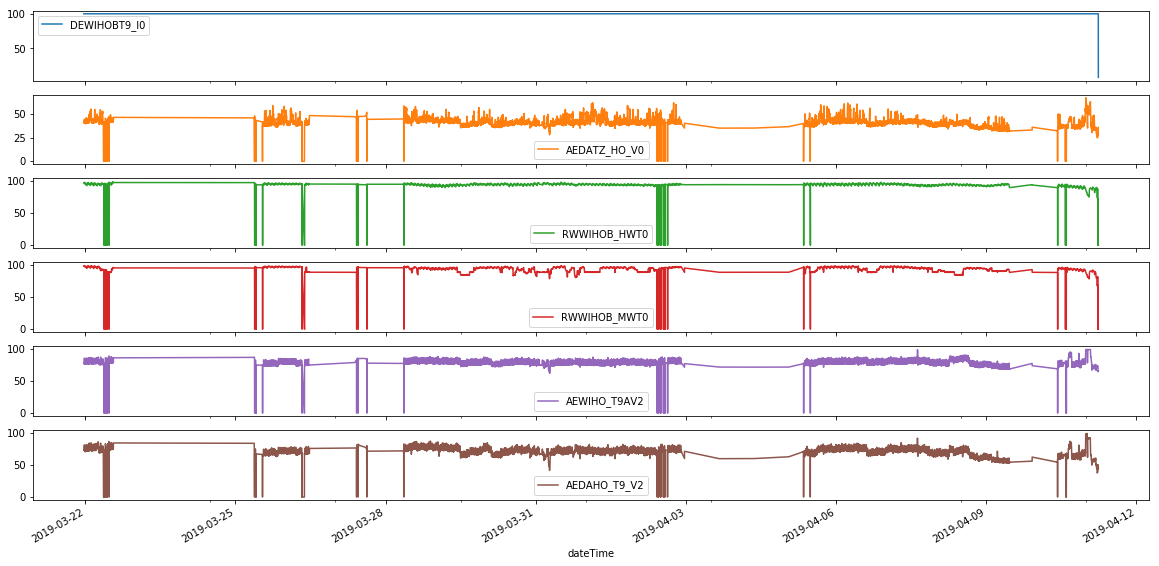

In [19]:
bx = multivariate_data_modify.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

# Below the row will be deleted where any value of any column will be zero

In [20]:
from numpy import nan
multivariate_data_drop_zero= multivariate_data.replace(0,nan)
multivariate_data_drop_zero=multivariate_data_drop_zero.dropna(how='any',axis=0)

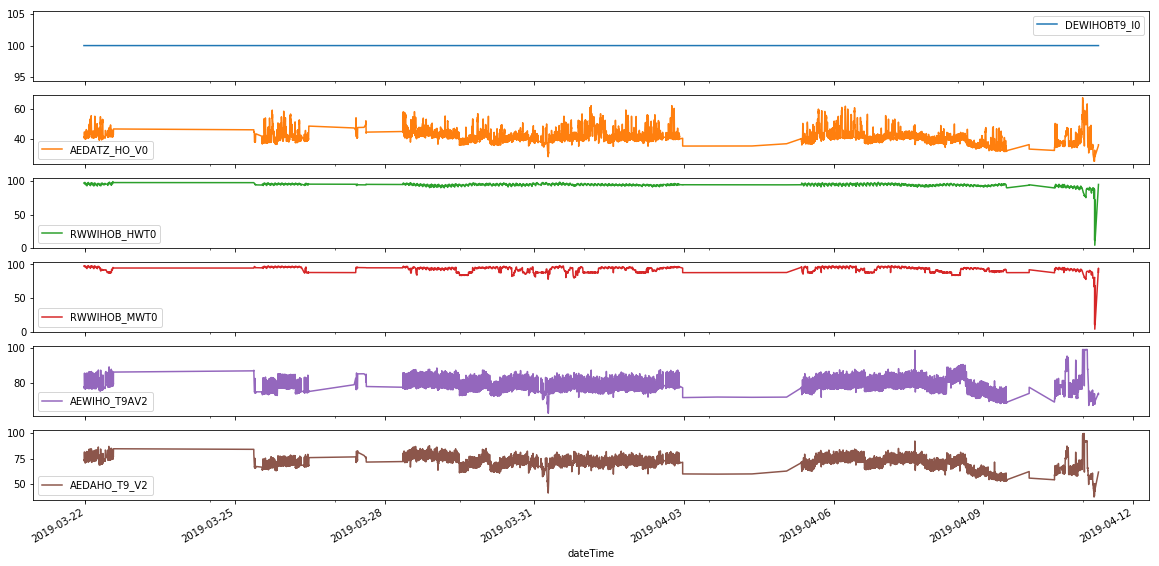

In [56]:
cx = multivariate_data_drop_zero.plot(subplots=True, layout=(size_column,1))
# plt.legend(loc='upper left')
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [22]:
print('shape of multivariate_data: ',multivariate_data.shape)
print('shape of multivariate_data_modify: ', multivariate_data_modify.shape)
print('shape of multivariate_data_drop_zero: ',multivariate_data_drop_zero.shape)

shape of multivariate_data:  (17500, 6)
shape of multivariate_data_modify:  (17139, 6)
shape of multivariate_data_drop_zero:  (16968, 6)


In [15]:
# # remove this line if you want do not want to count mean. Just comment it and uncomment the below lines.
# multi_mean=multivariate_data.mean()
# multivariate_data_mean= multivariate_data.replace(0,multi_mean)

In [16]:
# multivariate_data_mean.plot()
# plt.show()

In [23]:
# from sklearn import preprocessing

# min_max_scaler = preprocessing.MinMaxScaler()
# np_scaled = min_max_scaler.fit_transform(multivariate_data_mean)

# df_normalized = pd.DataFrame(np_scaled,index=multivariate_data.index,columns=multivariate_column_label)

In [24]:
# print(df_normalized.tail())

In [25]:
# df_normalized.plot()
# plt.show()

In [26]:
# dataset=np.array(multivariate_data_mean)
dataset=np.array(multivariate_data_drop_zero)

NumberOfElements=int(len(dataset)*0.9)
print('dataset length: ',len(dataset))
print('Number of Elements for training: ',NumberOfElements)

multiple_ip_train_data=dataset[0:NumberOfElements]
print(multiple_ip_train_data.shape)
multiple_ip_test_set=dataset[NumberOfElements:len(dataset)]
print(multiple_ip_test_set.shape)

dataset length:  16968
Number of Elements for training:  15271
(15271, 6)
(1697, 6)


In [27]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

C:\Users\atif\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [28]:
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_1):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_1
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix,:-1], sequence[end_ix,-1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [29]:
n_steps_1 = 4
# split into samples
X_ip_cnn_lstm, Y_op_cnn_lstm = split_sequence(multiple_ip_train_data, n_steps_1)
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]

In [30]:
print('X_ip_cnn_lstm shape: ',X_ip_cnn_lstm.shape,'\tX_ip_cnn_lstm size: ',X_ip_cnn_lstm.size,'\tX_ip_cnn_lstm dimension: ',X_ip_cnn_lstm.ndim)
print('Y_op_cnn_lstm shape: ',Y_op_cnn_lstm.shape,'\tY_op_cnn_lstm size: ',Y_op_cnn_lstm.size,'\tY_op_cnn_lstm dimension: ',Y_op_cnn_lstm.ndim)

X_ip_cnn_lstm shape:  (15267, 4, 5) 	X_ip_cnn_lstm size:  305340 	X_ip_cnn_lstm dimension:  3
Y_op_cnn_lstm shape:  (15267,) 	Y_op_cnn_lstm size:  15267 	Y_op_cnn_lstm dimension:  1


In [31]:
n_features = X_ip_cnn_lstm.shape[-1]
n_seq = 2
n_steps_2 = 2
train_ip_cnn_lstm = X_ip_cnn_lstm.reshape((X_ip_cnn_lstm.shape[0], n_seq, n_steps_2, n_features))

In [32]:
print('train_ip_cnn_lstm shape: ',train_ip_cnn_lstm.shape,'\ttrain_ip_cnn_lstm size: ',
      train_ip_cnn_lstm.size,'\ttrain_ip_cnn_lstm dimension: ',train_ip_cnn_lstm.ndim)

train_ip_cnn_lstm shape:  (15267, 2, 2, 5) 	train_ip_cnn_lstm size:  305340 	train_ip_cnn_lstm dimension:  4


#  without using validation split you cannot save the best model. Then you can use False instead of True in the return of save_best_only argument

In [46]:
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

lr = 0.01

def lr_schedule(epoch):
    return lr * (0.1 ** int(epoch / 10))

batch_size=32
epochs= 100

# define model
def cnn_lstm():
    model = Sequential()
    model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps_2, n_features)))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    return model
cnn_lstm=cnn_lstm()
cnn_lstm.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

# fit model
cnn_lstm.fit(train_ip_cnn_lstm,Y_op_cnn_lstm,batch_size=batch_size, epochs=epochs, verbose=1,
         callbacks=[LearningRateScheduler(lr_schedule),
                     ModelCheckpoint('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/trained_model_file/cnn_LSTM_norm_30.h5',
                                     save_best_only=True)])

Epoch 1/100
15267/15267 [==============================] - 3s 184us/step - loss: 36.0777 - acc: 0.0000e+00
Epoch 2/100
 1472/15267 [=>............................] - ETA: 1s - loss: 17.7115 - acc: 0.0000e+00

C:\Users\atif\Anaconda3\lib\site-packages\keras\callbacks.py:434: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


15267/15267 [==============================] - 2s 108us/step - loss: 17.4435 - acc: 0.0000e+00
Epoch 3/100
15267/15267 [==============================] - 2s 106us/step - loss: 16.6915 - acc: 0.0000e+00
Epoch 4/100
15267/15267 [==============================] - 2s 136us/step - loss: 14.2321 - acc: 0.0000e+00
Epoch 5/100
15267/15267 [==============================] - 2s 104us/step - loss: 17.1841 - acc: 0.0000e+00
Epoch 6/100
15267/15267 [==============================] - 1s 97us/step - loss: 15.2827 - acc: 0.0000e+00
Epoch 7/100
15267/15267 [==============================] - 2s 99us/step - loss: 13.8888 - acc: 0.0000e+00
Epoch 8/100
15267/15267 [==============================] - 1s 98us/step - loss: 13.0818 - acc: 0.0000e+00
Epoch 9/100
15267/15267 [==============================] - 1s 96us/step - loss: 12.6357 - acc: 0.0000e+00
Epoch 10/100
15267/15267 [==============================] - 2s 100us/step - loss: 11.6360 - acc: 0.0000e+00
Epoch 11/100
15267/15267 [==========================

15267/15267 [==============================] - 2s 101us/step - loss: 8.9396 - acc: 0.0000e+00
Epoch 80/100
15267/15267 [==============================] - 2s 103us/step - loss: 8.9396 - acc: 0.0000e+00
Epoch 81/100
15267/15267 [==============================] - 2s 108us/step - loss: 8.9396 - acc: 0.0000e+00
Epoch 82/100
15267/15267 [==============================] - 2s 101us/step - loss: 8.9396 - acc: 0.0000e+00
Epoch 83/100
15267/15267 [==============================] - 1s 98us/step - loss: 8.9396 - acc: 0.0000e+00
Epoch 84/100
15267/15267 [==============================] - 1s 95us/step - loss: 8.9396 - acc: 0.0000e+00
Epoch 85/100
15267/15267 [==============================] - 1s 95us/step - loss: 8.9396 - acc: 0.0000e+00
Epoch 86/100
15267/15267 [==============================] - 1s 95us/step - loss: 8.9396 - acc: 0.0000e+00
Epoch 87/100
15267/15267 [==============================] - 1s 95us/step - loss: 8.9396 - acc: 0.0000e+00
Epoch 88/100
15267/15267 [=============================

In [47]:
X_CNN_Lstm_test, y_CNN_Lstm_test = split_sequence(multiple_ip_test_set, n_steps_1)

x_input = X_CNN_Lstm_test.reshape((X_CNN_Lstm_test.shape[0], n_seq, n_steps_2, X_CNN_Lstm_test.shape[-1]))

In [48]:
print(x_input.shape)

(1693, 2, 2, 5)


In [49]:
# from keras.models import load_model

# load_trained_model=load_model('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/trained_model_file/CNN_LSTM_norm_30.h5')

yhat = cnn_lstm.predict(x_input, verbose=1)
# print(yhat)

1693/1693 [==============================] - 0s 140us/step


In [50]:
# print(y_CNN_Lstm_test)

In [51]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Print MSE to see how good the model is
Error = mean_squared_error(y_CNN_Lstm_test,yhat)
print('mean squared error: ',Error)
print('RMSE Error: ',sqrt(Error))

mean squared error:  41.22989216207793
RMSE Error:  6.421050705459187


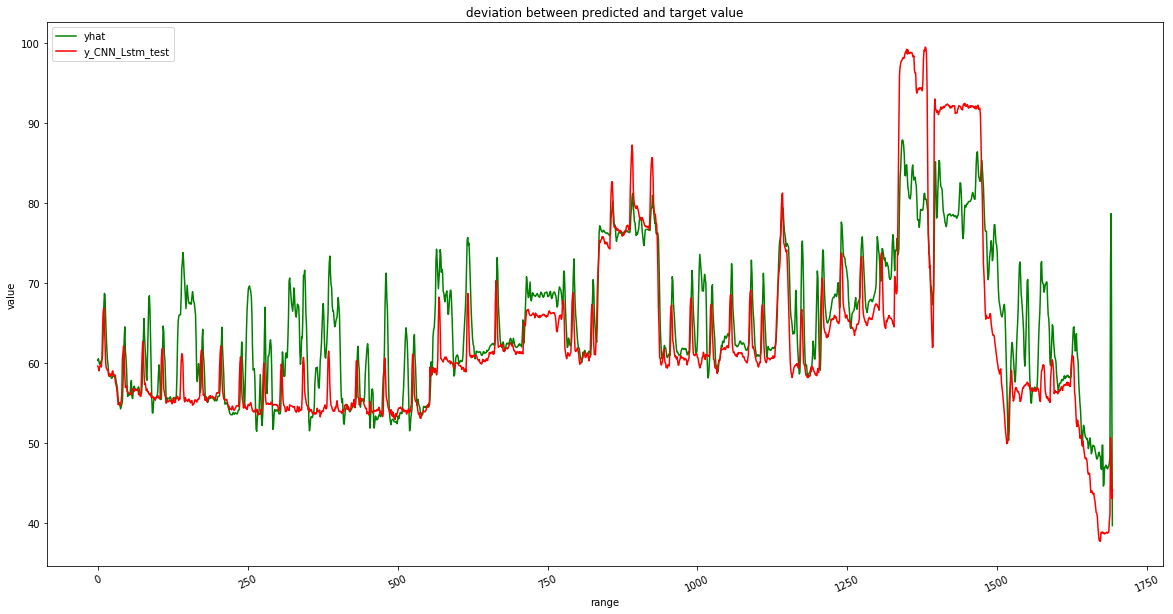

In [52]:
# my_data_1.index[0:-1]
plt.plot(yhat,color='green')
plt.plot(y_CNN_Lstm_test,color='red')
plt.xticks( rotation=25)
plt.title('deviation between predicted and target value')
plt.ylabel('value')
plt.xlabel('range')
plt.legend(['yhat', 'y_CNN_Lstm_test'], loc='upper left')
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

# Unnormalize data to test

In [ ]:
# finding max value from each column
max_array=[]
i=0
for idx,val in enumerate(list(multivariate_data_mean.columns)):
    x=multivariate_data_mean[val].max()
    q=[val,x]
    max_array.append(q)

In [ ]:
max_array

In [ ]:
target_column_max_value=max_array[-1][-1]

In [ ]:
target_column_max_value

In [ ]:
unnormalized_yhat=yhat*target_column_max_value
unnormalized_y_CNN_Lstm_test=y_CNN_Lstm_test*target_column_max_value

In [ ]:
print(unnormalized_yhat.shape)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

#Print MSE to see how good the model is
Error = mean_squared_error(unnormalized_y_CNN_Lstm_test,unnormalized_yhat)
print('mean squared error: ',Error)
print('RMSE Error: ',sqrt(Error))
Error_1 = mean_absolute_error(unnormalized_y_CNN_Lstm_test,unnormalized_yhat)
print('Mean Absolute Error: ',Error_1)

In [ ]:
plt.plot(unnormalized_yhat,color='green')
plt.plot(unnormalized_y_CNN_Lstm_test,color='red')
plt.xticks( rotation=25)
plt.title('deviation between predicted and target value')
plt.ylabel('value')
plt.xlabel('range')
plt.legend(['unnormalized_yhat', 'unnormalized_y_CNN_Lstm'], loc='upper left')
plt.show()

In [ ]:
def do_reshape(ready_ip_1):
    global n_seq,n_steps_2
    x_input = ready_ip_1.reshape((ready_ip_1.shape[0], n_seq, n_steps_2, ready_ip_1.shape[-1]))
    return x_input

def make_test_set(start,end,multivariate_column_label):
    global test_new
    test_dataset=test_new.iloc[start:end][multivariate_column_label]
    test_dataset=test_dataset.loc[::-1]
    mean_value=test_dataset.mean()
    test_dataset_mean= test_dataset.replace(0,mean_value)
    global min_max_scaler
    np_scaled_1 = min_max_scaler.fit_transform(test_dataset_mean)
    df_normalized_1 = pd.DataFrame(np_scaled_1,columns=multivariate_column_label)
    df_normalized_2=np.array(df_normalized_1)
    ready_ip,ready_op=split_sequence(df_normalized_2,n_steps_1)
    reshaped_input=do_reshape(ready_ip)
    
    return test_dataset_mean,reshaped_input,ready_op


mean_data,reshaped_ip,real_op=make_test_set(18000,20000,multivariate_column_label)

# my_data_array=np.array(norm_data)
# ready_ip,ready_op=split_sequence(my_data_array,n_steps_1)

# reshaped_input=do_reshape(ready_ip)

In [ ]:
mean_data.head()

In [ ]:
print(reshaped_input.shape)

In [ ]:
maximum_val=real_op.max()
print(maximum_val)
yhat_new=cnn_lstm.predict(reshaped_input, verbose=1)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Print MSE to see how good the model is
Error = mean_squared_error(real_op,yhat_new)
print('mean squared error: ',Error)
print('RMSE Error: ',sqrt(Error))
Error_1 = mean_absolute_error(real_op,yhat_new)
print('Mean Absolute Error: ',Error_1)

In [ ]:
plt.plot(yhat_new,color='green')
plt.plot(real_op,color='red')
plt.xticks( rotation=25)
plt.title('deviation between predicted and target value')
plt.ylabel('value')
plt.xlabel('range')
plt.legend(['predicted_op', 'actual_op'], loc='upper left')
plt.show()

In [ ]:
# finding max value from each column
max_array_1=[]
i=0
for idx,val in enumerate(list(multivariate_data_mean.columns)):
    x=mean_data[val].max()
    q=[val,x]
    max_array_1.append(q)

In [ ]:
max_array_1

In [ ]:
target_max=max_array_1[-1][-1]

In [ ]:
unnormalized_prdicted=yhat_new*target_max
unnormalized_actual_op=real_op*target_max

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Print MSE to see how good the model is
Error = mean_squared_error(unnormalized_actual_op,unnormalized_prdicted)
print('mean squared error: ',Error)
print('RMSE Error: ',sqrt(Error))
Error_1 = mean_absolute_error(unnormalized_actual_op,unnormalized_prdicted)
print('Mean Absolute Error: ',Error_1)

In [ ]:
plt.plot(unnormalized_prdicted,color='green')
plt.plot(unnormalized_actual_op,color='red')
plt.xticks( rotation=25)
plt.title('deviation between predicted and target value')
plt.ylabel('value')
plt.xlabel('range')
plt.legend(['predicted_op', 'actual_op'], loc='upper left')
plt.show()